In [1]:
# change to `%matplotlib` for interactive methods
%matplotlib inline

from imgseries import ImgSeries, GreyLevel

# Define image series to work on

In [2]:
basefolder = Path('data')
folders = [basefolder / folder for folder in ('img1', 'img2')]
images = ImgSeries(folders, savepath=basefolder)

# Minimal analysis

In [3]:
gl = GreyLevel(images)

The line below assumes that analysis zones have already been defined and saved in the metadata file (see details further below)

In [4]:
gl.regenerate()
gl.zones.show()

<AxesSubplot:title={'center':'Analysis Zones (img #0)'}>

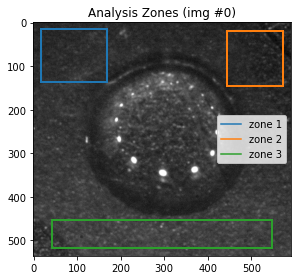

Now, run analysis on these zones.

In [7]:
gl.run()

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 106.65it/s]


Note that for large numbers of images, it can be faster to distribute computation across multiple computer cores:

In [8]:
gl.run(parallel=True)  # has some startup delay due to multiprocessing initiation

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  8.41it/s]


Results are stored in the `data` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)) 

In [9]:
gl.data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


In [27]:
gl.animate()

In [28]:
gl.inspect()

Plot grey level of every zone as a function of time:

<AxesSubplot:xlabel='time (unix)'>

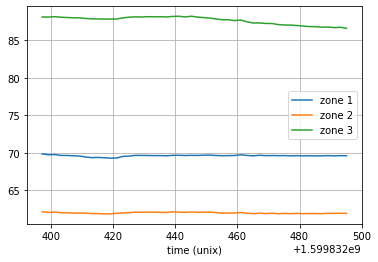

In [11]:
gl.data.set_index('time (unix)').filter(like='zone').plot(grid=True)

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including zone info, path info, and code version info is also saved in a .json file at the same time. 

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call save().

In [12]:
gl.save()

# Defining and viewing analysis zones

Zone defining has to be done at least once.

**Important**: Matplotlib must be in an interactive mode to do so.

Defining does not need to be done again in the following situations:
- calling methods again from the same `gl` object, e.g. `gl.run()`
- calling `gl.zones.load()` to load zones data from saved metadata (.json) file.

In [31]:
gl.zones.define()  # define one zone using the first image of the series

In [32]:
gl.zones.define(3)  # define 3 zones using the first image of the series

In [5]:
gl.zones.define(3, num=10)  # define 3 zones using image #10 in the series

In [33]:
gl.zones.define(3, draggable=True)  # define 3 zones using draggable rectangles instead of clicks

Rectangle position recorded. Rectangle deleted.
Rectangle position recorded. Rectangle deleted.
Rectangle position recorded. Rectangle deleted.


Viewing analysis zones after defining or loading them:

In [13]:
gl.zones.data

{'zone 1': [18, 15, 152, 121],
 'zone 2': [444, 19, 129, 127],
 'zone 3': [44, 454, 504, 65]}

<AxesSubplot:title={'center':'Analysis Zones (img #33)'}>

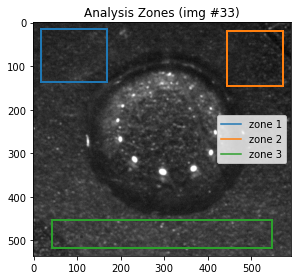

In [15]:
gl.zones.show(33)  # show zones on 33th image of series

**Note**: At the moment, saving zones data is done by calling `gl.save()`, which saves both data and metadata. Be careful because calling `gl.save()` also overwrites saved analysis data (potentially with no data if no analysis has been run yet). This makes sure that metadata in .json files actually corresponds to the data in the .tsv file.

# Analyze only subset of images

In [16]:
gl.run(start=10)  # Analyze only from image #10
gl.data.head()

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 103.75it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
10,img1,img-00620.png,1.599832e+09,69.350315,61.856314,87.849756
11,img1,img-00621.png,1.599832e+09,69.297303,61.864005,87.862515
12,img1,img-00622.png,1.599832e+09,69.311712,61.934322,87.858669
13,img1,img-00623.png,1.599832e+09,69.532514,61.980773,88.021184
14,img1,img-00624.png,1.599832e+09,69.571009,62.028444,88.105708


In [17]:
gl.run(end=25)  # Analyze only up to image #25, not included
gl.data.tail()

100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 106.47it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
20,img1,img-00630.png,1.599832e+09,69.613093,62.047305,88.140324
21,img1,img-00631.png,1.599832e+09,69.673227,62.133492,88.208303
22,img1,img-00632.png,1.599832e+09,69.678936,62.095953,88.231166
23,img1,img-00633.png,1.599832e+09,69.648380,62.065739,88.135928
24,img1,img-00634.png,1.599832e+09,69.673173,62.109687,88.232692


In [18]:
gl.run(skip=5)  # Analyze only every 5-th image
gl.data.head()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 106.67it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
5,img1,img-00615.png,1.599832e+09,69.612766,61.969603,88.029915
10,img1,img-00620.png,1.599832e+09,69.350315,61.856314,87.849756
15,img1,img-00625.png,1.599832e+09,69.669367,62.093512,88.155311
20,img1,img-00630.png,1.599832e+09,69.613093,62.047305,88.140324


# Load analysis data a posteriori

In [19]:
gl = GreyLevel(images)

### Load data and metadata for external use

In [20]:
data = gl.load()
data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


In [21]:
metadata = gl.load_metadata()
metadata

{'path': 'C:\\Users\\olivier.vincent\\Python-OV\\imgseries\\data',
 'folders': ['img1', 'img2'],
 'zones': {'zone 1': [18, 15, 152, 121],
  'zone 2': [444, 19, 129, 127],
  'zone 3': [44, 454, 504, 65]},
 'rotation': {'angle': -0.3425123582361368},
 'crop': {'zone': [10, 8, 591, 536]},
 'time (utc)': '2023-01-28 17:36:08',
 'code version': {'skimage': {'status': 'not a git repository',
   'tag': 'v0.17.2'},
  'imgseries': {'hash': 'b0a2feb45338e8e7b44b2ee5084baff27516db6b',
   'status': 'dirty'},
  'imgbasics': {'hash': '95ab3694d6b2b6525bbd25ebe9dc0319eaeeeab8',
   'status': 'clean',
   'tag': 'v0.2.1'},
  'filo': {'hash': '150574b5ae82c74d0c500b3fdb494e8f9c7631f7',
   'status': 'clean',
   'tag': 'v1.1.5'},
  'matplotlib': {'status': 'not a git repository', 'tag': 'v3.3.2'},
  'numpy': {'status': 'not a git repository', 'tag': 'v1.19.2'}}}

If one wants to use zone methods as above, one must first reload the zones using saved data:

In [22]:
gl.zones.load()  # dict of tuples (xmin, ymin, width height) for every zone analyzed
gl.zones.data

{'zone 1': [18, 15, 152, 121],
 'zone 2': [444, 19, 129, 127],
 'zone 3': [44, 454, 504, 65]}

### Completely regenerate state after analysis to be able to use all GreyLevel methods

In [23]:
gl.regenerate()

In [24]:
print(gl.img_series.crop)
print(gl.img_series.rotation)
print(gl.zones)
gl.data.head()

Crop object {'zone': [10, 8, 591, 536]}
Rotation object {'angle': -0.3425123582361368}
Zones object {'zone 1': [18, 15, 152, 121], 'zone 2': [444, 19, 129, 127], 'zone 3': [44, 454, 504, 65]}


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


If one wants to show the zones on actual images, one must either specify `paths` in the `glevels` instanciation above, or reload the file info using `load_info()` (see above). Note that the image files must still be present in the same location, or `load_info` must be called with a specific filename containing updated file location):

# Load / save with custom filenames

Loading and saving data can accept custom filenames as arguments, without extensions (they are added automatically, with `.tsv` for analysis data, and `.json` for metadata, e.g. (lines below should follow a `gl.run()` so that `gl.data` is defined):

In [25]:
gl.save('Img_GreyLevel_SavingTest')  # generates both .json and .tsv files

In [26]:
data = gl.load('Img_GreyLevel_SavingTest')  # loads from .tsv file
data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293
